In [2]:
cd ..

/Users/dorislee/Desktop/Research/vizdatasci/datasci-api


In [3]:
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2
from dataset.Dataset import Dataset
from dataObj.DataObj import DataObj
from dataObj.Row import Row
from dataObj.Column import Column

In [5]:
dataset = Dataset("data/cars.csv")

In [6]:
uObj = DataObj(dataset,[Column("MilesPerGal"), Column("Year")]) #underspecified object
# Should return fully specified
# DataObj(dataset,[Column("MilesPerGal",dataModel="measure",dataType="numeric"),
# Column("Year",dataModel="dimension",dataType="date")])

In [7]:
# Specified Viz Example
# Note that the compiler will expand the spec with dataModel and dataType information automatically 
# Test Example Scatterplot
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
# Column("Weight",dataModel="measure",channel='y')])
# Test Example Histogram
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x')])
# Test Example Bar Chart
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
# Column("Origin",dataModel="dimension",channel='y')])
# Test Example Line Chart
# dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
# Column("Year",dataModel="dimension",dataType="date",channel='y')])

dobj = DataObj(dataset,[Column("MilesPerGal",dataModel="measure", channel='x'),
 Column("Year",dataModel="dimension",dataType="date",channel='y')])

In [8]:
# viz.display()

In [9]:
# def display(dobj,renderer=Altair)

In [10]:
Ndim = 0 
Nmsr = 0 
for spec in dobj.spec: 
    if (spec.dataModel == "dimension"):
        Ndim +=1
    elif (spec.dataModel == "measure"):
        Nmsr +=1

In [11]:
from vizLib.altair.BarChart import BarChart
from vizLib.altair.ScatterChart import ScatterChart
from vizLib.altair.Histogram import Histogram
from vizLib.altair.LineChart import LineChart

In [12]:
countCol = Column("Count")

In [13]:
def filterDataModel(dobj,dmodel):
    return list(filter(lambda x: x.dataModel==dmodel if hasattr(x,"dataModel") else False,dobj.spec))

In [35]:
# TODO: possibly implement chart alternatives as a list of possible encodings
if (Ndim == 0 and Nmsr ==1):
    # Histogram with Count on the y axis
    chart = Histogram(dobj)
elif (Ndim ==2 and Nmsr==0):
    pass
elif (Ndim ==0 and Nmsr==2):
    # Scatterplot
    chart = ScatterChart(dobj)
elif (Ndim ==1 and Nmsr ==2):
    # Scatterplot broken down by the dimension
    pass 
elif (Ndim ==1 and (Nmsr ==0 or Nmsr==1)):
    # Bar Chart
    if (Nmsr==0): dobj.spec.append(countCol)
    dimension = filterDataModel(dobj,"dimension")[0]
    dimType = dimension.dataType
    if (dimType =="date" or dimType == "oridinal"):
        chart = LineChart(dobj)
    else: # unordered categorical
        chart = BarChart(dobj)
        # TODO: if cardinality large than 6 then sort bars
elif (Ndim ==2 and Nmsr==1):
    # Bar/Line chart broken down by dimension
    dimension = filterDataModel(dobj,"dimension")
    d1 = dimension[0]
    d2 = dimension[1]
    if (dobj.dataset.cardinality[d1.columnName]<dobj.dataset.cardinality[d2.columnName]):
        d1.channel = "color"
    else:
        d2.channel = "color"
    chart = lineOrBar(dobj)
#     chart.breakdownBy()
elif (Ndim==3):
    pass
else:
    pass

In [40]:
def lineOrBar(dobj):
    dimension = filterDataModel(dobj,"dimension")[0]
    dimType = dimension.dataType
    if (dimType =="date" or dimType == "oridinal"):
        chart = LineChart(dobj)
    else: # unordered categorical
        chart = BarChart(dobj)
        # TODO: if cardinality large than 6 then sort bars

Ndim,Nmsr: 2 1
here


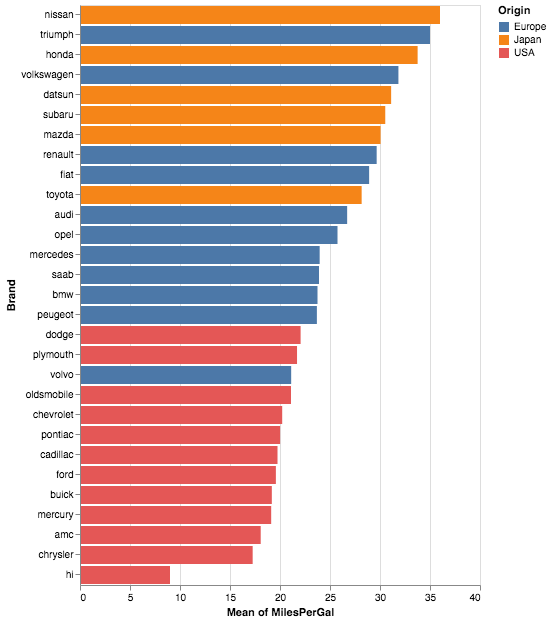

In [58]:
uObj = DataObj(dataset,[Column("MilesPerGal"), Column("Brand"), Column("Origin")])
uObj.display()

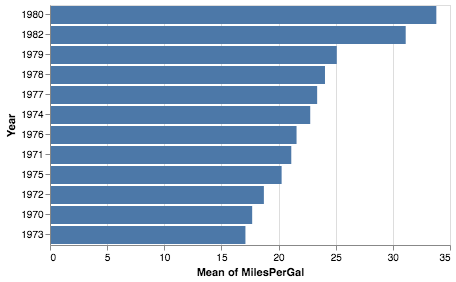

In [67]:
uObj = DataObj(dataset,[Column("MilesPerGal"), Column("Year")])
uObj.display()

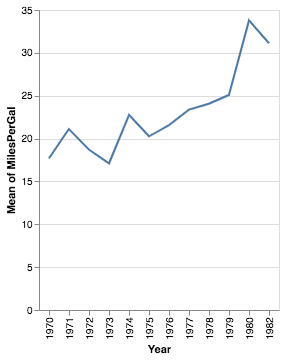

In [68]:
uObj = DataObj(dataset,[Column("MilesPerGal"), Column("Year",dataType="date")])
uObj.display()